<a href="https://colab.research.google.com/github/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


## <center> **Developing a Score to Measure Riskiness of Residential Properties Insurance** 

<center><em>Developing a Score to Measure Riskiness of Residential buildings, Homes, Apartments and Condos as part of an insurance policy underwriting. Insurance underwriting is how an insurance company evaluates its risk. In this project, we identify and explore multiple data sources to collect variables that could be used to develop a score that measures the riskiness of residential buildings to aid the insurance underwriting process.</em></center>



<center><img src="https://github.com/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/assets/real-estate-risk.jpg?raw=1" width=600/></center>

***Project Contributors:*** Kuzi Rusere and Umair Shaikh<br>
**MVP streamlit App URL:** https://kkrusere-developing-a-score-to-measure-prototype-mvp-app-acxav4.streamlitapp.com


### **Exploratory Data Analysis** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#we install the Python SQL Toolkit and Object Relational Mapper and the python MySQL connector
!pip install SQLAlchemy
!pip install mysql-connector-python
!pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.4 MB 67 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.3 MB/s 


In [4]:
#change directory so that we can access the config.py file 
%cd /content/drive/MyDrive/capstone

/content/drive/MyDrive/capstone


Reading in the data from AWS MySQL RDS

In [5]:
#we read the data from the AWS RDS
from sqlalchemy import create_engine
import mysql.connector as connection
import config


host= config.host
user= config.user
db_password = config.password
port = config.port
database = config.database


engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

try:
    query = f"SELECT * FROM NYC311Open_Data"
    dataframe = pd.read_sql(query,engine)

except Exception as e:
    print(str(e))

In [6]:
dataframe.head()

,Unique Key,Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Resolution Description,Borough,Latitude,Longitude
0,25595691,2013-05-23,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,11209.0,7207 3 AVENUE,3 AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.633380,-74.026993
1,25595692,2013-05-23,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10457.0,269 EAST BURNSIDE AVENUE,EAST BURNSIDE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.851333,-73.902133
2,25595877,2013-05-23,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,10472.0,1963 HAVILAND AVENUE,HAVILAND AVENUE,ADDRESS,BRONX,The City has removed the graffiti from this pr...,BRONX,40.829475,-73.858298
3,25595984,2013-05-23,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11229.0,1820 AVENUE V,AVENUE V,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.597049,-73.952872
4,25596010,2013-05-23,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10467.0,3535 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.882408,-73.879058


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048735 entries, 0 to 6048734
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Date                    datetime64[ns]
 2   Agency                  object        
 3   Agency Name             object        
 4   Complaint Type          object        
 5   Descriptor              object        
 6   Location Type           object        
 7   Incident Zip            object        
 8   Incident Address        object        
 9   Street Name             object        
 10  Address Type            object        
 11  City                    object        
 12  Resolution Description  object        
 13  Borough                 object        
 14  Latitude                float64       
 15  Longitude               float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(12)
memory usage: 738.4+ MB


Lets take a look at the Complaints, the Most common Complaints and the Least common Complaints. We are going to use the pandas `value_counts()` function to aggregate and count the unique complaints and plot the frequency distribution.

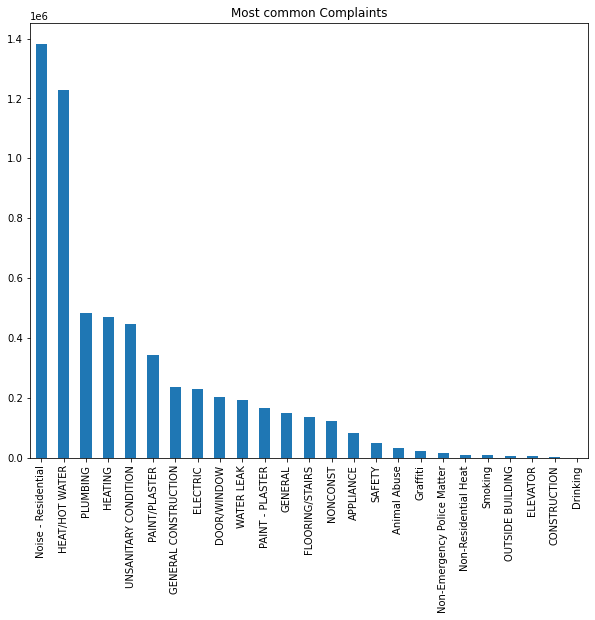

In [7]:
#the most common complaints
temp_df = dataframe['Complaint Type'].value_counts()
temp_df.head(25).plot(kind='bar', figsize=(10,8), title = 'Most common Complaints')

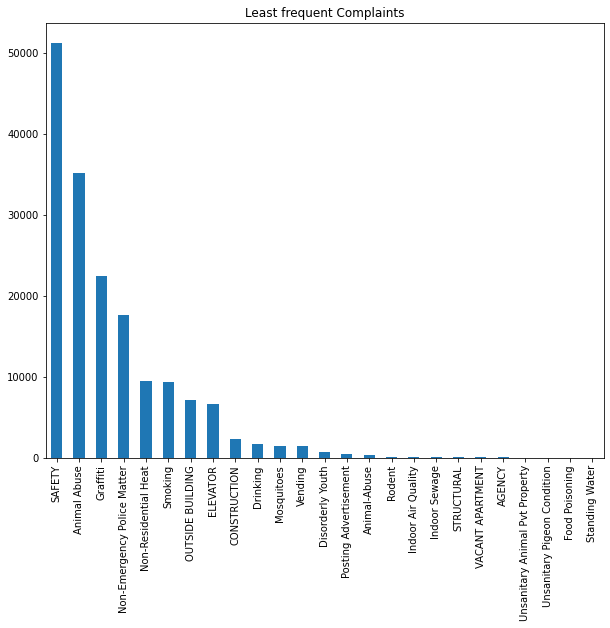

In [8]:
#the least common complaints 
temp_df = dataframe['Complaint Type'].value_counts()
temp_df.tail(25).plot(kind='bar', figsize=(10,8), title = 'Least frequent Complaints')

Here, we can take a look at the distribution of the complaints within the NYC `Boroughs`. Again, we will utilize the pandas `value_counts()` fuction for the aggregation and counting. We will visualize the distribution using a pie chart.

In [17]:
dataframe['Borough'].value_counts()

BROOKLYN         1971727
BRONX            1813690
MANHATTAN        1282070
QUEENS            858873
STATEN ISLAND     122373
Unspecified            2
Name: Borough, dtype: int64

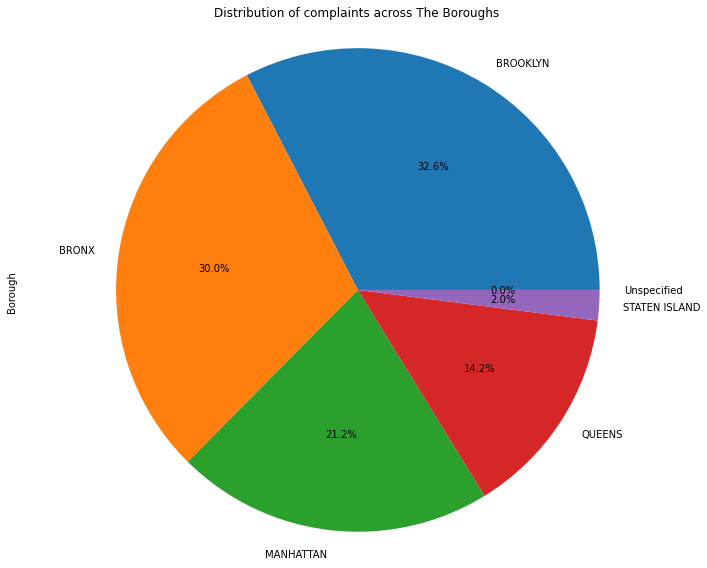

In [15]:
dataframe['Borough'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of complaints across The Boroughs')
plt.tight_layout()
plt.show()

Looks like `Brooklyn` has the highest percentage of the complaints at 32%, followed by the `Bronx` at 30%. `Staten Island` has the lowest number/percentage of complaints at 2%. Now we can drill down into these borough and look at the most and least common type of complaints per borough. For that we will create a fuction that takes in the name of the borough and plots the most common and least common complain.

In [24]:
def Most_type_of_complaints_per_borough(borough):
  """
  This function plots out the most common coplains per borough
  """
  temp_df = dataframe[dataframe['Borough'] == borough]['Complaint Type'].value_counts()
  print(f"Here we're looking at {borough} \n")
  temp_df.head(25).plot(kind='bar', figsize=(10,8), title = f"{borough}'s Most common Complaints")


def Least_type_of_complaints_per_borough(borough):
  """
  This function plots out the least common coplains per borough
  """
  temp_df = dataframe[dataframe['Borough'] == borough]['Complaint Type'].value_counts()
  temp_df.tail(25).plot(kind='bar', figsize=(10,8), title = f"{borough}'s Least frequent Complaints")

In [22]:
borough_list = list(dict(dataframe['Borough'].value_counts()).keys())
borough_list.remove('Unspecified')
borough_list

['BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

Here we're looking at BROOKLYN 



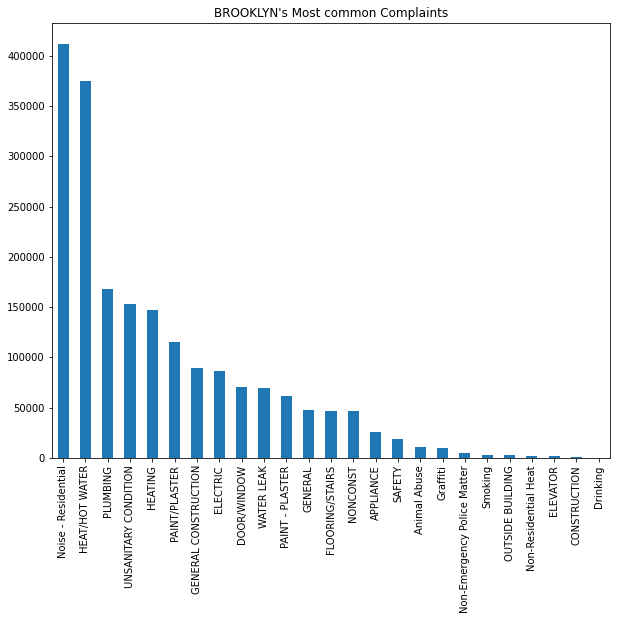

In [25]:
Most_type_of_complaints_per_borough(borough_list[0])


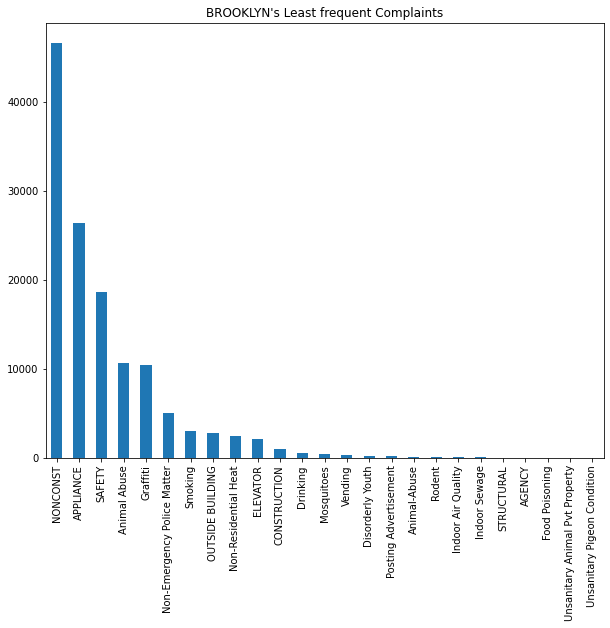

In [26]:
Least_type_of_complaints_per_borough(borough_list[0])

Here we're looking at BRONX 



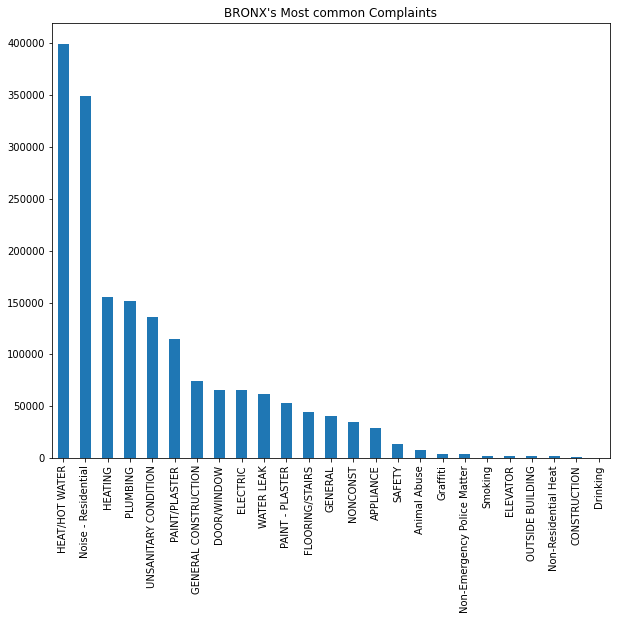

In [27]:
Most_type_of_complaints_per_borough(borough_list[1])


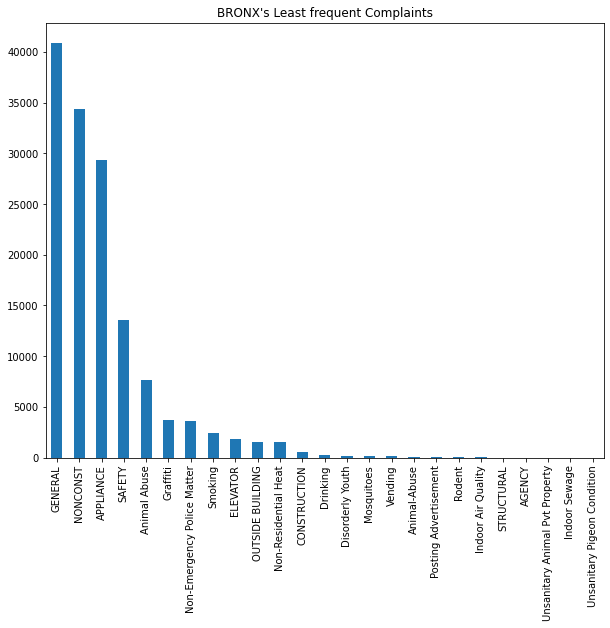

In [28]:
Least_type_of_complaints_per_borough(borough_list[1])

Here we're looking at MANHATTAN 



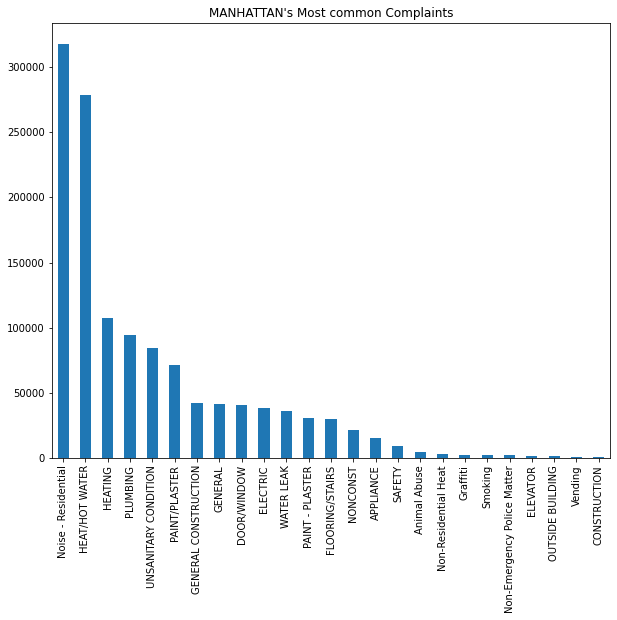

In [29]:
Most_type_of_complaints_per_borough(borough_list[2])


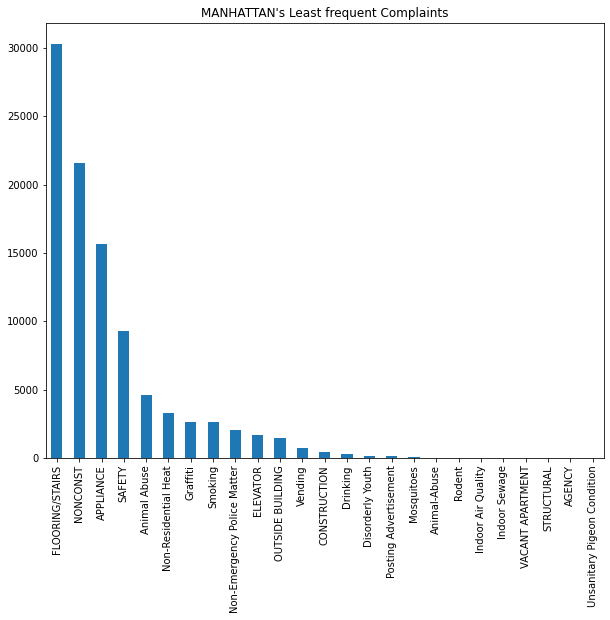

In [30]:
Least_type_of_complaints_per_borough(borough_list[2])

Here we're looking at QUEENS 



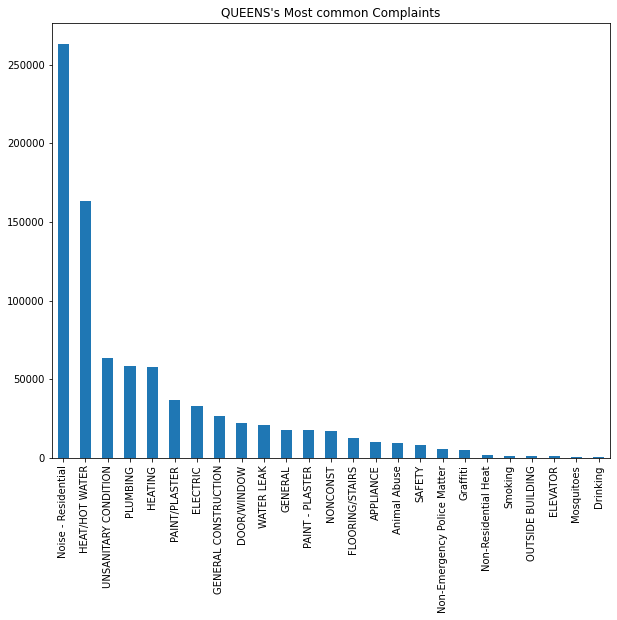

In [31]:
Most_type_of_complaints_per_borough(borough_list[3])


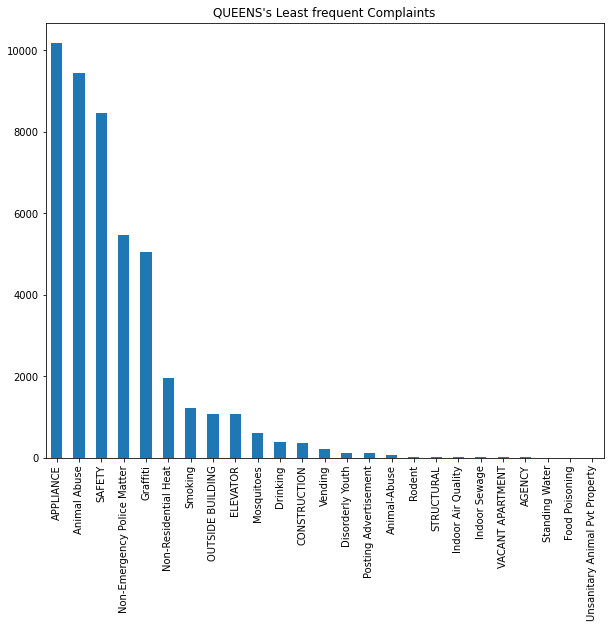

In [32]:
Least_type_of_complaints_per_borough(borough_list[3])

Here we're looking at STATEN ISLAND 



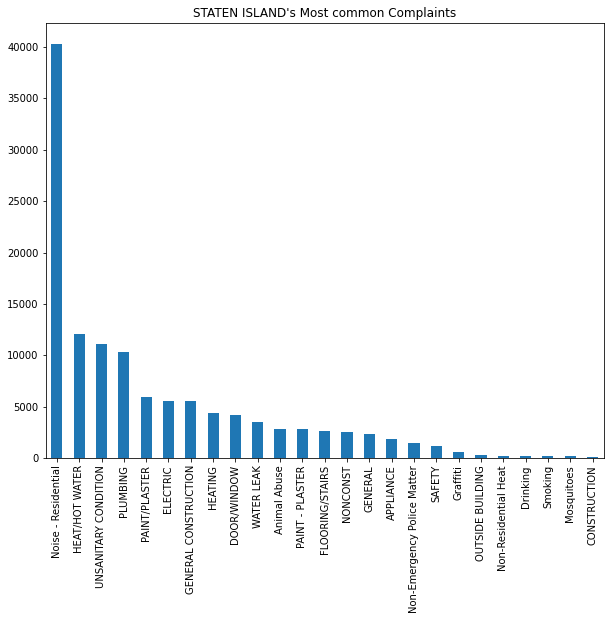

In [33]:
Most_type_of_complaints_per_borough(borough_list[4])


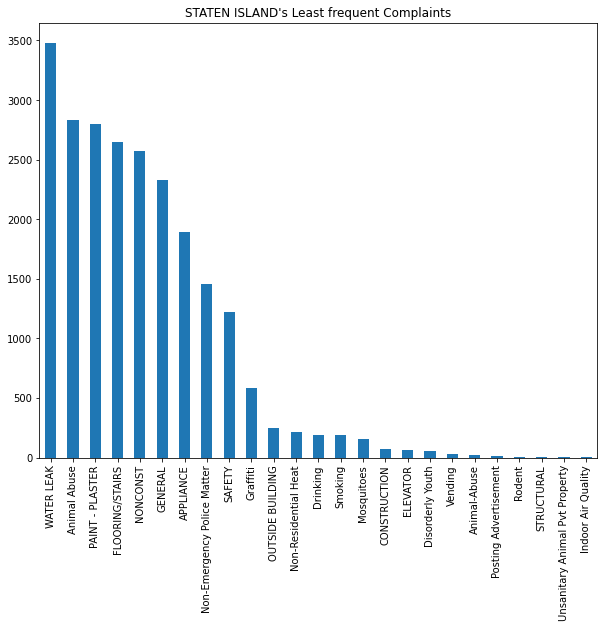

In [34]:
Least_type_of_complaints_per_borough(borough_list[4])

Here, we can look at the `Agency Name` and see the distribution of the requests per Agency. 

In [36]:
dataframe['Agency Name'].value_counts()

Department of Housing Preservation and Development    4565957
New York City Police Department                       1439947
Department of Sanitation                                21902
Department of Health and Mental Hygiene                 19389
Mosquito Control                                          967
Division of Alternative Management                        561
NYPD                                                        8
Investigation Review Section                                4
Name: Agency Name, dtype: int64

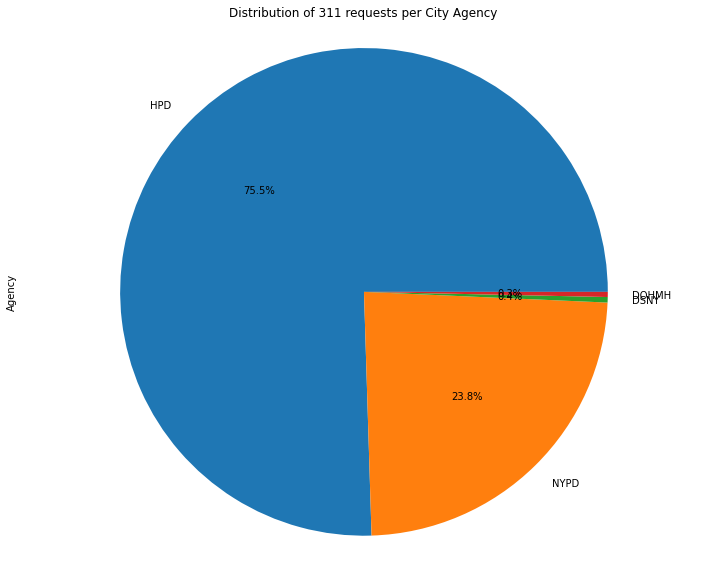

In [37]:
dataframe['Agency'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,8))

plt.axis('equal')
plt.title('Distribution of 311 requests per City Agency')
plt.tight_layout()
plt.show()

The majority of the requests in our dataset are coming from `Department of Housing Preservation and Development` which makes sense since we filtered the data by  `Residential` location type. The New York City Police Department only has 23.8% share of the data. We can go further and drill down at each of the agencies looking at the type of complaints thier get. 

In [39]:
Agency_name_list = list(dict(dataframe['Agency Name'].value_counts()).keys())
Agency_list = list(dict(dataframe['Agency'].value_counts()).keys())
Agency_dict = dict(zip(Agency_list,Agency_name_list))
Agency_dict

{'HPD': 'Department of Housing Preservation and Development',
 'NYPD': 'New York City Police Department',
 'DSNY': 'Department of Sanitation',
 'DOHMH': 'Department of Health and Mental Hygiene'}

In [45]:
def plot_most_common_complaints_per_agency(agency):
  temp_df = dataframe[dataframe['Agency'] == agency]['Complaint Type'].value_counts()
  print(f"Here we're looking at {agency} \n")
  temp_df.head(25).plot(kind='bar', figsize=(10,8), title = f"{Agency_dict.get(agency)}'s Most common Complaints")

In [46]:
Agency_list[0]

'HPD'

Here we're looking at HPD 



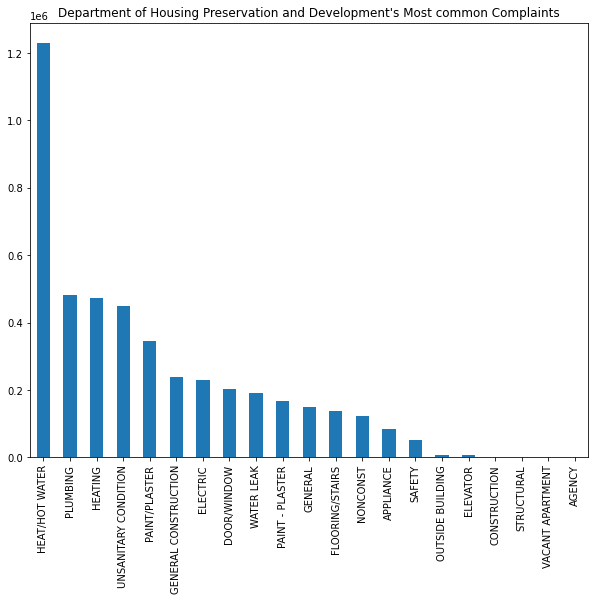

In [47]:
plot_most_common_complaints_per_agency(Agency_list[0])

Here we're looking at NYPD 



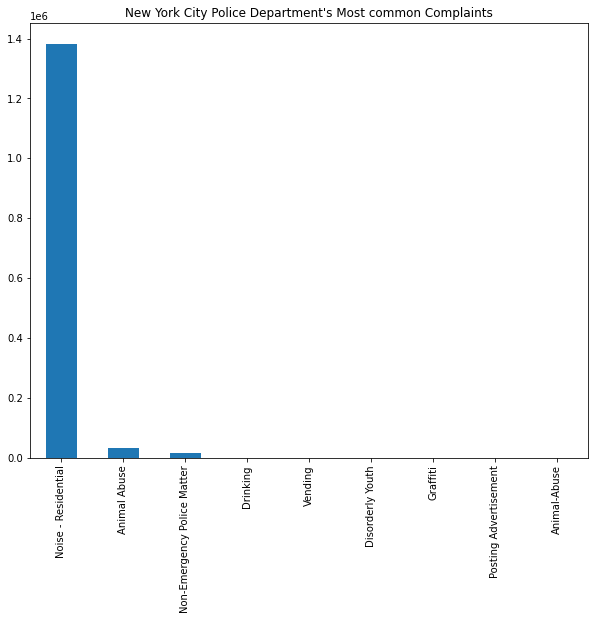

In [48]:
plot_most_common_complaints_per_agency(Agency_list[1])

Here we're looking at DSNY 



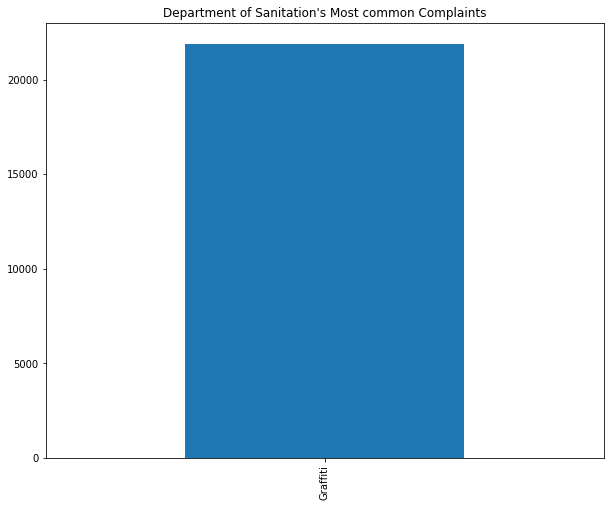

In [49]:
plot_most_common_complaints_per_agency(Agency_list[2])

Here we're looking at DOHMH 



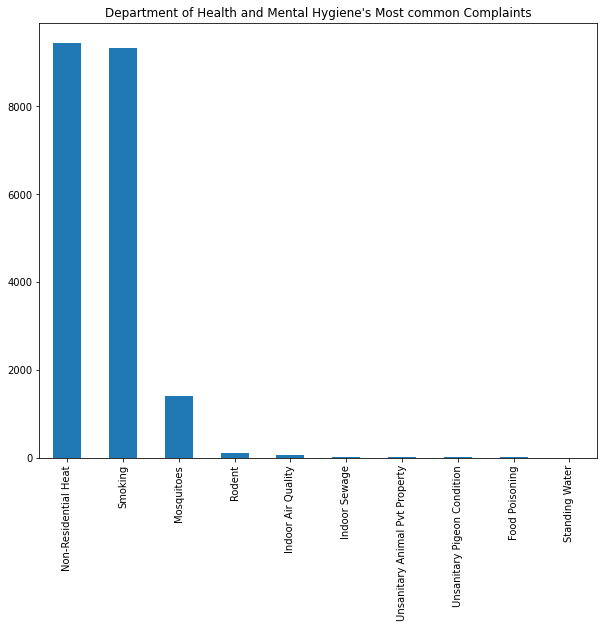

In [50]:
plot_most_common_complaints_per_agency(Agency_list[3])